# Import Packages

In [1]:
import os
import sys
import pandas as pd

from IPython.display import display

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from data.data_preprocessing import map_and_convert_categories
from utils.plotting import DataVisualiser
from utils.helpers import load_data, check_and_print_missing_value_counts

# Load data

In [2]:
data = load_data("train.csv")

# Initial Exploration
## Shape and Structure

In [3]:
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Dropping Unwanted Features
- id: This is just a unique identifier for each property in the dataset, which does not contribute to predicting sale price

In [4]:
data.drop(columns=['Id'], inplace=True)

## Data Types

In [5]:
pd.options.display.max_rows = None
display(data.dtypes.to_frame(name='DataType'))

,DataType
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object


## Data Type Conversion
The following features will be converted to categorical types for improved interpretability and accurate analysis:
1. **MSSubClass:** Represents the building type, with each value corresponding to a specific category (e.g., 20 = 1-Story 1946 & newer, 30 = 1-Story 1945 & older). These numeric codes are inherently categorical and do not have any quantitative relationship
2. **OverallQual:** Rates the overall material and finish quality of the house on a scale from 1 (Very Poor) to 10 (Excellent). These values are categorical codes representing quality levels rather than numerical values with a mathematical relationship
3. **OverallCond:** Rates the overall condition of the house on a scale from 1 (Very Poor) to 10 (Excellent). Similar to OverallQual, these values are categorical codes indicating condition levels, not ordinal or quantitative data
4. **Other Categorical Columns:** Columns with abbreviations will be mapped to their corresponding full names (e.g., Ex to "Excellent", Gd to "Good") to improve clarity and interpretability in both analysis and visualizations

In [6]:
data = map_and_convert_categories(data)

# Univariate Analysis

In [7]:
visualizer = DataVisualiser(data)

## MSSubClass
### Checking for missing values

In [8]:
check_and_print_missing_value_counts(data, 'MSSubClass')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [9]:
data['MSSubClass'].describe()

count                                1460
unique                                 15
top       1-STORY 1946 & NEWER ALL STYLES
freq                                  536
Name: MSSubClass, dtype: object

### Visualization

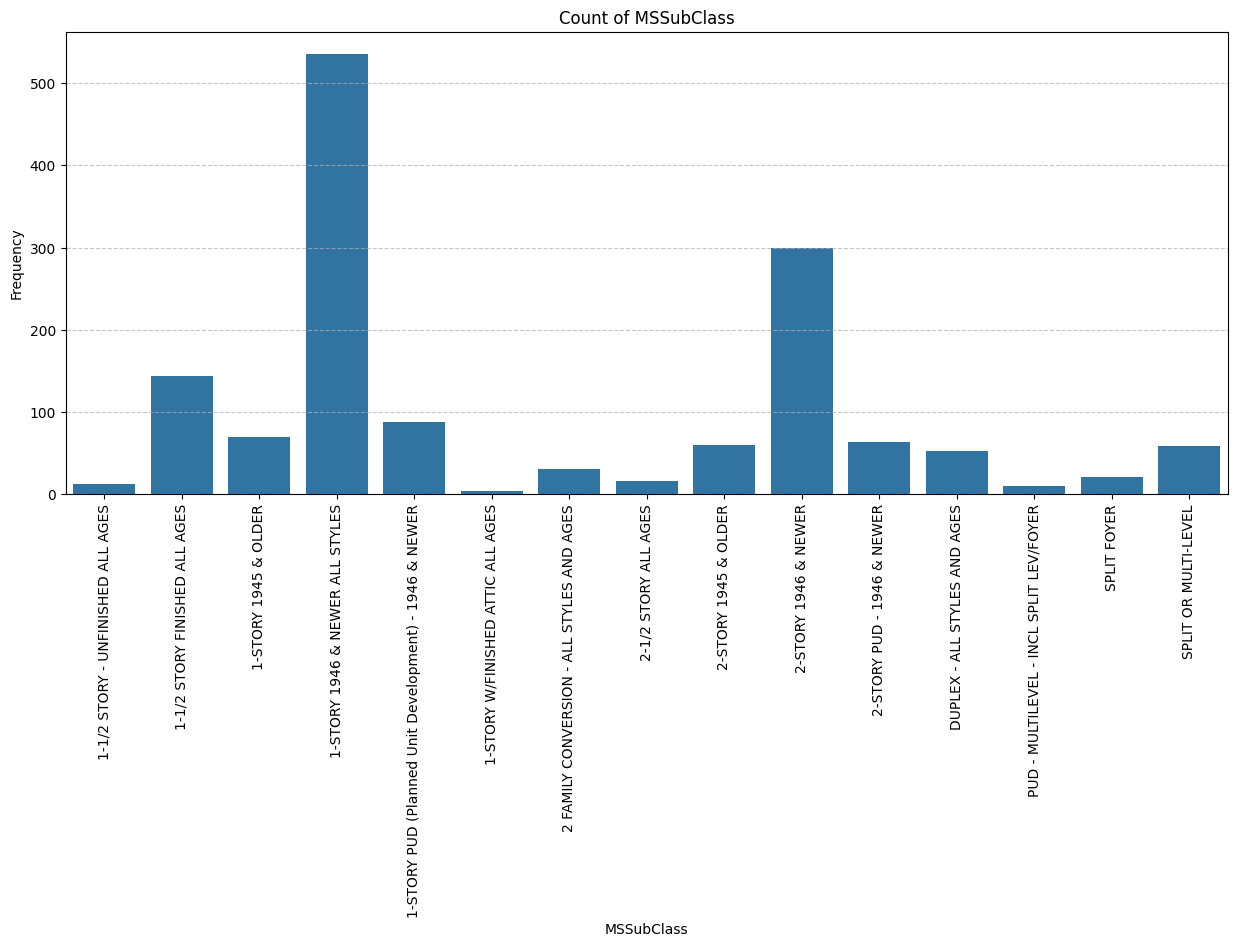

In [10]:
visualizer.plot('MSSubClass')

#### Insights:
- No Missing Values hence no need for imputation or handling nulls
- 15 unique housing types are represented
- 1-STORY 1946 & NEWER ALL STYLES dominates the dataset, with over 500 occurrences
- The second most frequent category is 2-STORY 1946 & NEWER, followed by others like 1-1/2 STORY FINISHED ALL AGES
- Less frequent categories include PUD (Planned Unit Development) MULTILEVEL
- This indicates that the dataset is skewed towards more modern housing styles (post-1946), especially one-story homes

## MSZoning
### Checking for missing values

In [12]:
check_and_print_missing_value_counts(data, 'MSZoning')

Missing values count: 10
Missing values percentage: 0.68%


### Descriptive statistics

In [13]:
data['MSZoning'].describe()

count                        1450
unique                          4
top       Residential Low Density
freq                         1151
Name: MSZoning, dtype: object

### Visualization

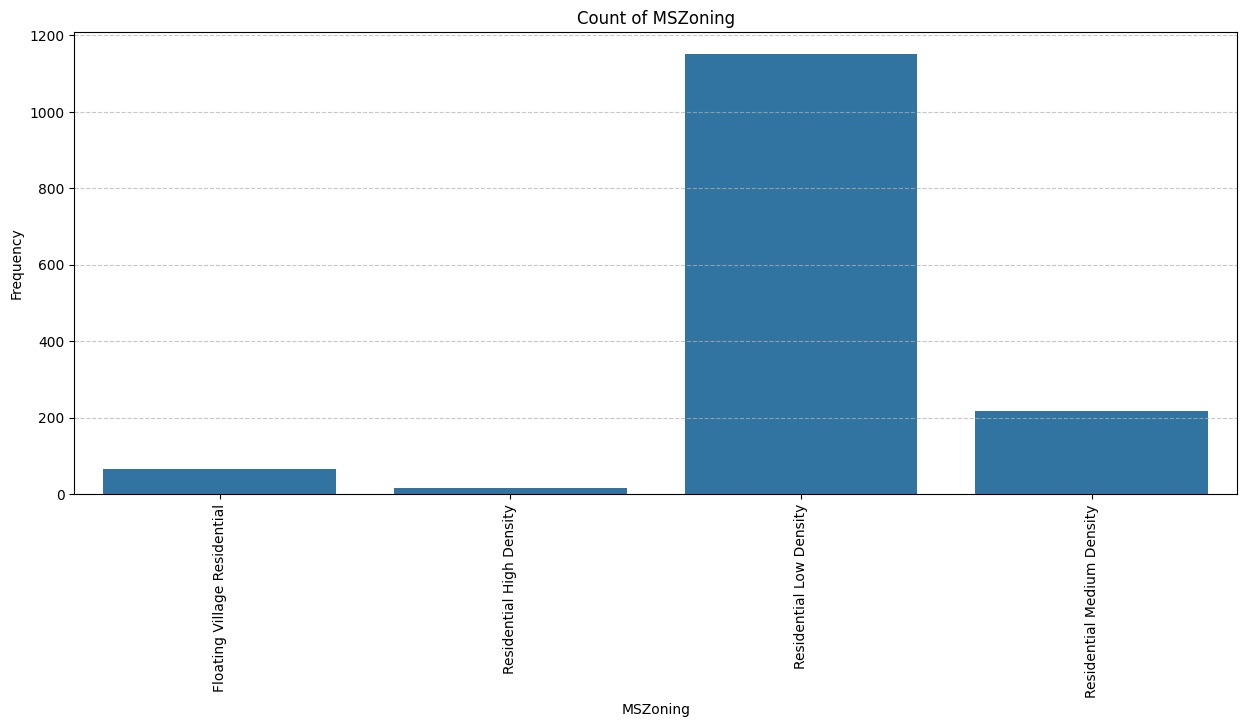

In [14]:
visualizer.plot('MSZoning')

#### Insights:
- A small portion of this column is missing (i.e 10 values)
- The dataset contains 4 unique zoning categories, showing a relatively simple distribution of zoning types
- The most frequent zoning classification is Residential Low Density (RL), with over 1150 occurrences. This suggests a strong representation of low-density residential properties in the dataset
- Residential Medium Density (RM) appears as the second most frequent category, followed by smaller counts of Floating Village Residential (FV) and Residential High Density (RH)
- The Floating Village Residential and Residential High Density zones represent niche segments in this dataset

## LotFrontage
### Checking for missing values

In [15]:
check_and_print_missing_value_counts(data, 'LotFrontage')

Missing values count: 259
Missing values percentage: 17.74%


### Descriptive statistics

In [16]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

### Visualization

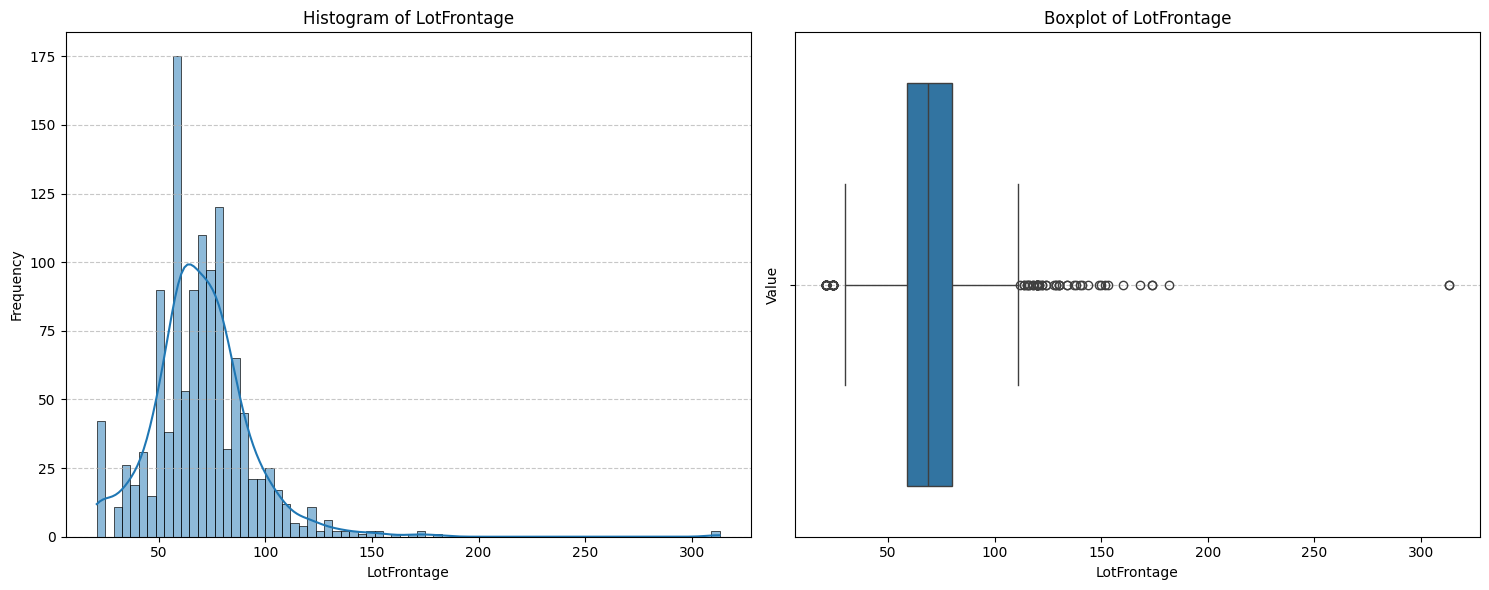

In [17]:
visualizer.plot('LotFrontage')

## Insights:
- 259 missing values (17.74%): A significant proportion of values are missing and will need to be addressed through imputation or other strategies.
- **Summary Statistics:**
    - Mean: ~70 feet, indicating the average property frontage.
    - Median (50%): 69 feet, close to the mean, indicating a somewhat symmetric distribution.
    - Minimum: 21 feet, likely smaller properties or corner lots.
    - Maximum: 313 feet, an outlier suggesting unusually large properties or plots.
    - 25th Percentile (Q1): 59 feet and 75th Percentile (Q3): 80 feet, indicating most properties fall between these ranges.
    - Standard Deviation: 24.28 feet, suggesting a moderate spread of values around the mean.
- **Histogram:** The distribution is right-skewed, with most properties having frontage in the range of 50–100 feet.
A long tail extends towards higher values, suggesting the presence of outliers.
- **Boxplot:** Highlights a significant number of outliers on the lower and higher end (values below ~25 feet and values exceeding ~120 feet)

## LotArea	
### Checking for missing values

In [18]:
check_and_print_missing_value_counts(data, 'LotArea')

Missing values count: 0
Missing values percentage: 0.0%
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### Descriptive statistics

In [19]:
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

### Visualization

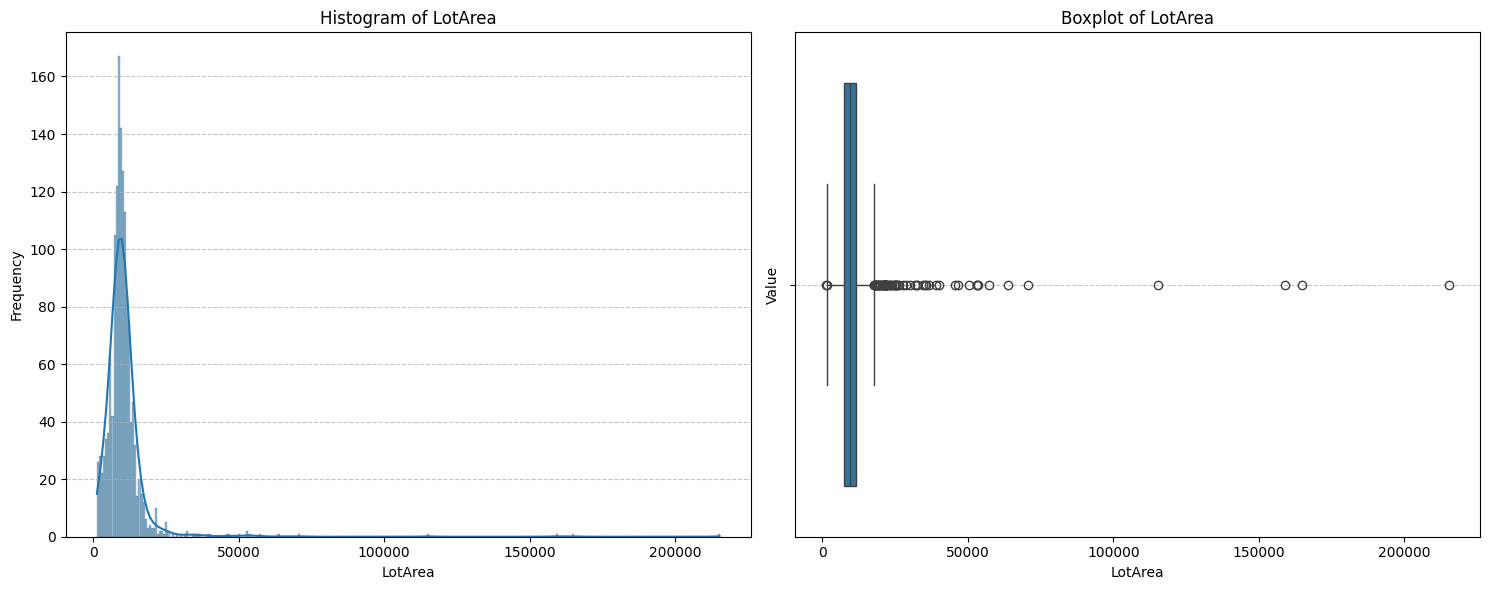

In [20]:
visualizer.plot('LotArea')

#### Insights:
-  No missing values, so no imputation is necessary.
- **Summary Statistics:**
    - Mean: ~10,512 square feet, indicating the average lot size.
    - Median (50%): ~9,478 square feet, slightly lower than the mean, suggesting a slight right skew.
    - Minimum: 1,300 square feet, representing small plots.
    - Maximum: 215,245 square feet, representing a massive property likely to be an outlier.
    - 25th Percentile (Q1): 7,553 square feet and 75th Percentile (Q3): 11,601 square feet, showing that the middle 50% of properties range from small to moderately large lots.
    - Standard Deviation: ~9,981 square feet, indicating significant variation in lot sizes.
- **Histogram:**
    - The distribution is highly right-skewed, with most properties concentrated below ~20,000 square feet.
    - A few extremely large properties (above ~30,000 square feet) contribute to the skew.
- **Boxplot:** Highlights the presence of many outliers, especially above ~30,000 square feet. These extreme values likely represent unique or unusual properties

## Street	
### Checking for missing values

In [22]:
check_and_print_missing_value_counts(data, 'Street')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [23]:
data['Street'].describe()

count      1460
unique        2
top       Paved
freq       1454
Name: Street, dtype: object

### Visualization

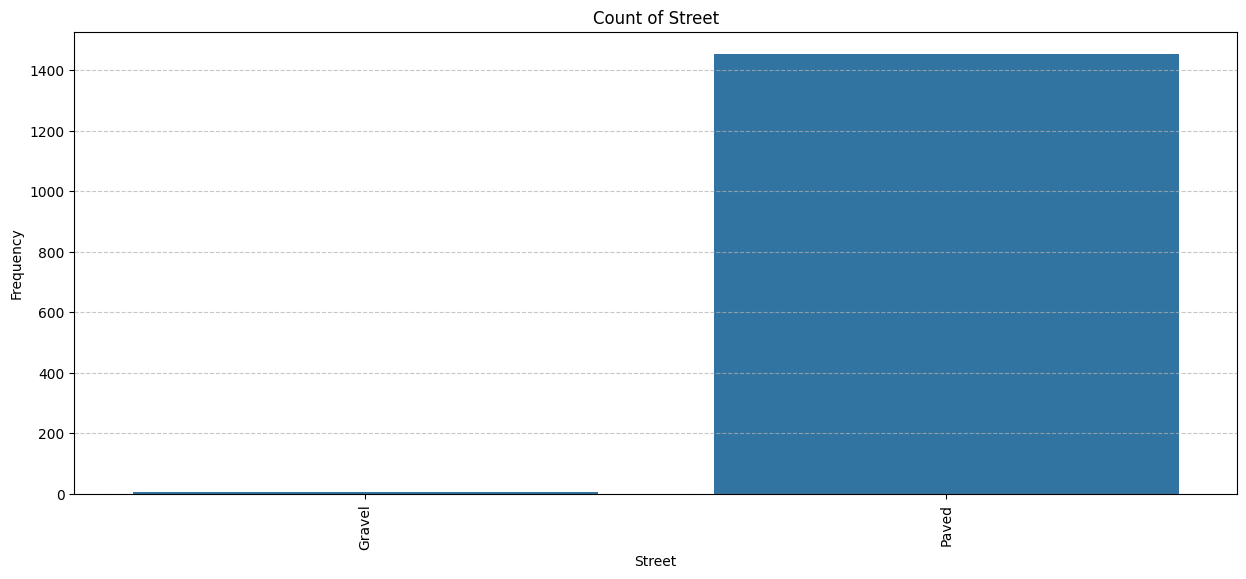

In [24]:
visualizer.plot('Street')

#### Insights:
- The dataset is complete for this variable.
- 1,454 properties (~ 99.6%) have paved road access and only 6 properties (~ 0.4%) have gravel road access.
- The dominant category is Paved, indicating that almost all properties are accessible via paved roads.
- **Count Plot:**
    - The visualization confirms the overwhelming dominance of Paved roads in the dataset.
    - The Gravel category represents a very small fraction, appearing as a negligible bar in the plot.

## Alley
### Checking for missing values

In [25]:
check_and_print_missing_value_counts(data, 'Alley')

Missing values count: 1369
Missing values percentage: 93.77%


### Descriptive Statistics

In [26]:
data['Alley'].describe()

count         91
unique         2
top       Gravel
freq          50
Name: Alley, dtype: object

### Visualization

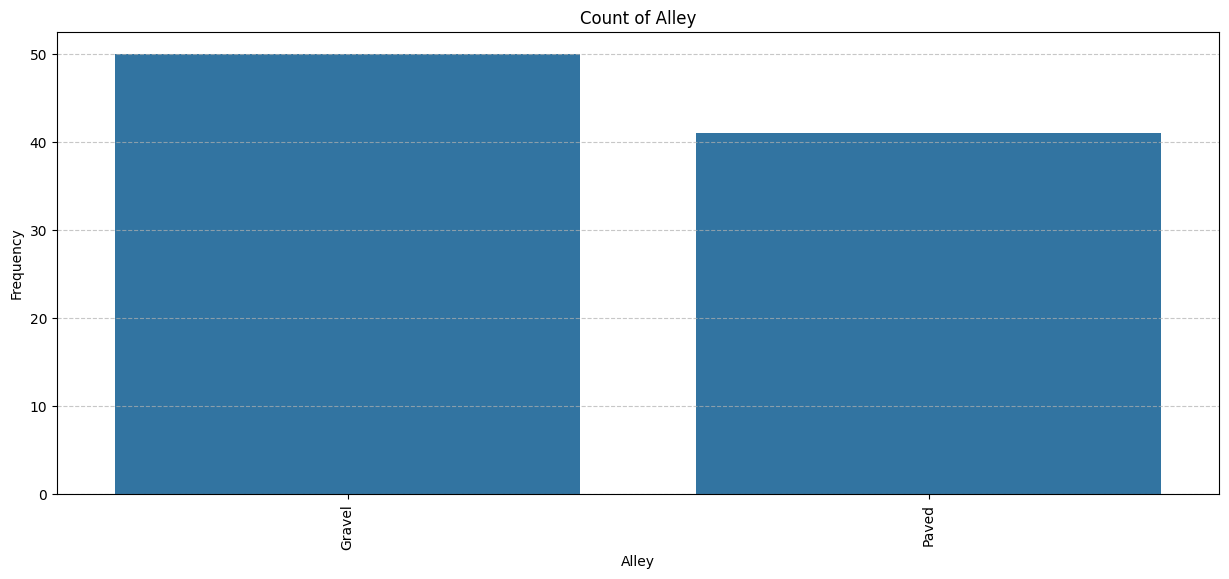

In [28]:
visualizer.plot('Alley')

#### Insights:
- 1369 missing values (93.77%): A vast majority of the properties do not have alley access, as indicated by missing values
- Missing values in this context likely represent the absence of an alley and may not need traditional imputation but rather treated as a separate category, e.g., "No Alley"
- Gravel: 50 occurrences, making it the most common type of alley access among the properties with alleys
- Paved: 41 occurrences, representing the minority among the properties with alleys
- Only two types of alley surfaces are explicitly listed: Gravel and Paved
- **Count Plot:** The plot shows that Gravel alleys are slightly more frequent than Paved alleys, but both categories are vastly underrepresented due to the dominance of missing values

## LotShape
### Checking for missing values

In [29]:
check_and_print_missing_value_counts(data, 'LotShape')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [30]:
data['LotShape'].describe()

count        1460
unique          4
top       Regular
freq          925
Name: LotShape, dtype: object

### Visualization

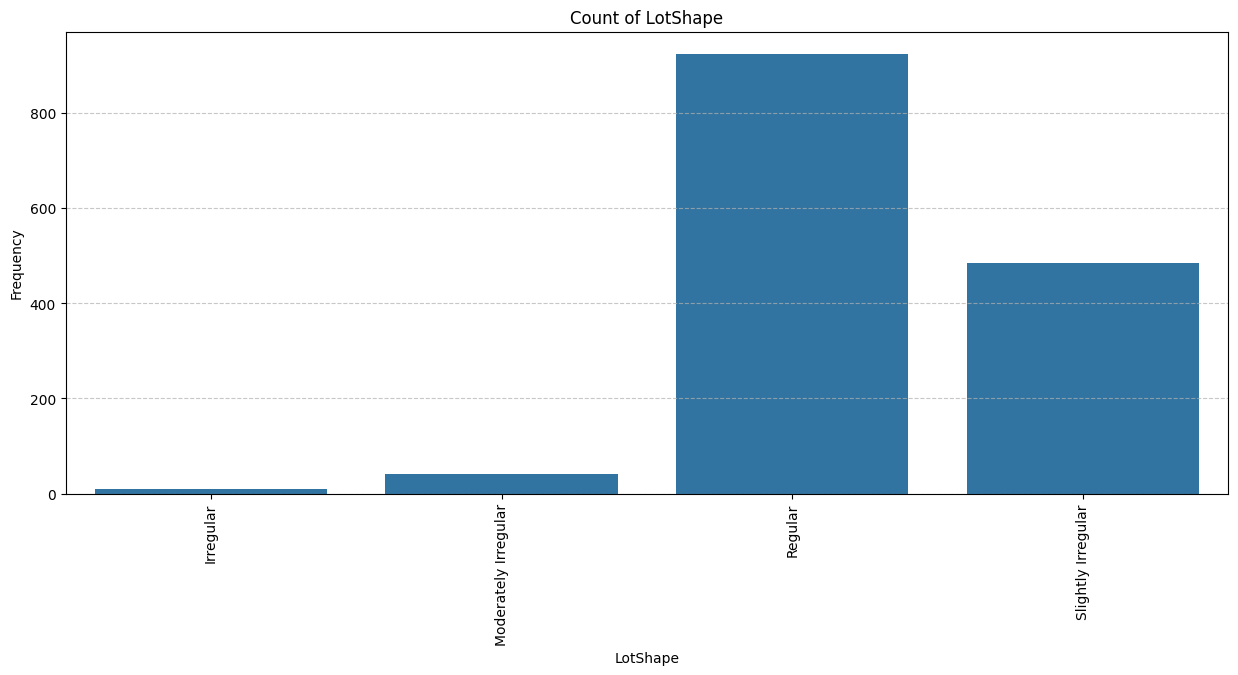

In [31]:
visualizer.plot('LotShape')

#### Insights:
-  No missing values, so the column is complete and ready for analysis.
-  The most common lot shape, with 925 properties (~63.4%), indicating that most properties have standard regular shapes.
-  Slightly Irregular: The second most common, with a significant proportion of properties (~30.5%).
-  Moderately Irregular: Rare, with only a small fraction of properties (~4.5%).
-  Irregular: Least common, accounting for less than 2% of the dataset.
- **Count Plot:**
    - The plot highlights the dominance of Regular lot shapes, followed by a notable number of Slightly Irregular shapes
    - Moderately Irregular and Irregular lot shapes are uncommon, appearing as much smaller bars

## LandContour
### Checking for missing values

In [32]:
check_and_print_missing_value_counts(data, 'LandContour')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [33]:
data['LandContour'].describe()

count                1460
unique                  4
top       Near Flat/Level
freq                 1311
Name: LandContour, dtype: object

### Visualization

visualizer.plot('LandContour')

#### Insights:
-  The column is complete and ready for analysis.
-  **Distribution:**
    -  Near Flat/Level (Lvl): The most common contour, with 1,311 properties (~89.8%), indicating that the vast majority of properties are on flat or nearly flat land.
    -  Banked (Bnk): 63 properties (~4.3%), referring to lots with a significant rise from street grade.
    -  Depression (Low): 36 properties (~2.5%), representing low areas or depressions.
    -  Hillside (HLS): 50 properties (~3.4%), referring to properties with significant side-to-side slopes.
- **Count Plot:**
    - The plot shows a clear dominance of Near Flat/Level properties, with the other categories being significantly underrepresented.
    - Banked, Depression, and Hillside contours collectively account for just over 10% of the dataset.

## Utilities
### Checking for missing values

In [35]:
check_and_print_missing_value_counts(data, 'Utilities')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [36]:
data['Utilities'].describe()

count                     1460
unique                       2
top       All Public Utilities
freq                      1459
Name: Utilities, dtype: object

### Visualization

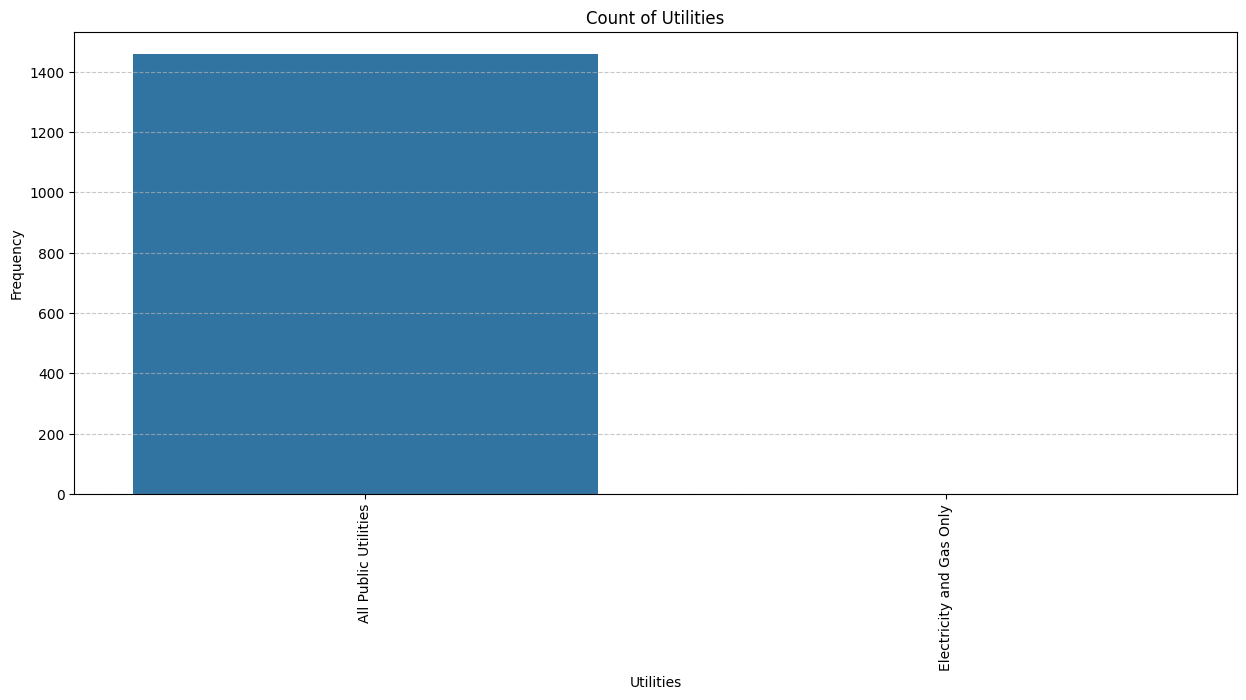

In [38]:
visualizer.plot('Utilities')

#### Insights:
- The column is complete, requiring no additional handling for missing data.
- **Distribution:**
    - All Public Utilities: Dominates the dataset, with 1,459 properties (~99.93%).
    - Electricity and Gas Only: Appears in only 1 property (~0.07%).
- **Count Plot:** The visualization clearly shows the overwhelming majority of properties have All Public Utilities, with Electricity and Gas Only being negligible

## LotConfig
### Checking for missing values

In [39]:
check_and_print_missing_value_counts(data, 'LotConfig')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [40]:
data['LotConfig'].describe()

count           1460
unique             5
top       Inside Lot
freq            1052
Name: LotConfig, dtype: object

### Visualization

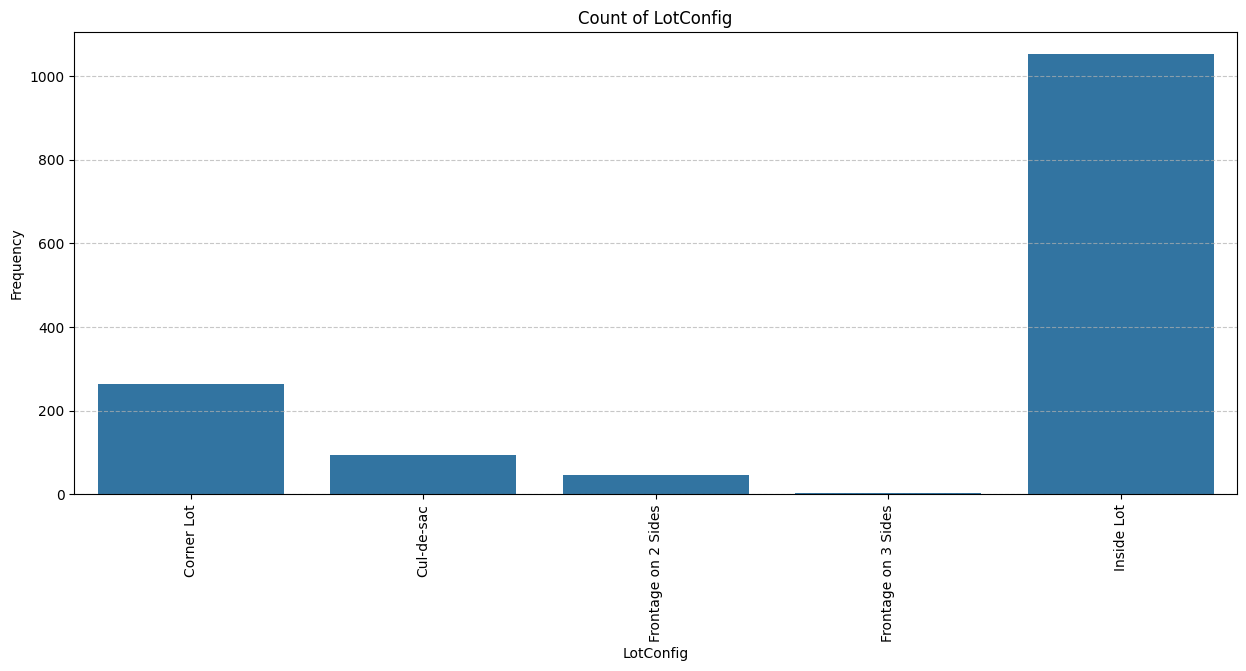

In [41]:
visualizer.plot('LotConfig')

#### Insights:
- The column is complete, requiring no missing value imputation.
- **Distribution:**
    - Inside Lot: The most common configuration, with 1,052 properties (~72.1%). These are standard interior lots.
    - Corner Lot: 263 properties (~18.0%), representing lots on the corner of two intersecting streets.
    - Cul-de-sac: 94 properties (~6.4%), located at the closed end of a street.
    - Frontage on 2 Sides: 41 properties (~2.8%).
    - Frontage on 3 Sides: Rare, with only 10 properties (~0.7%).
- **Count Plot:**
    - The dominance of Inside Lot is evident, followed by Corner Lot, with the remaining configurations having significantly smaller frequencies.
    - Frontage on 3 Sides is the least common configuration.

## LandSlope
### Checking for missing values

In [42]:
check_and_print_missing_value_counts(data, 'LandSlope')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [43]:
data['LandSlope'].describe()

count             1460
unique               3
top       Gentle Slope
freq              1382
Name: LandSlope, dtype: object

### Visualization

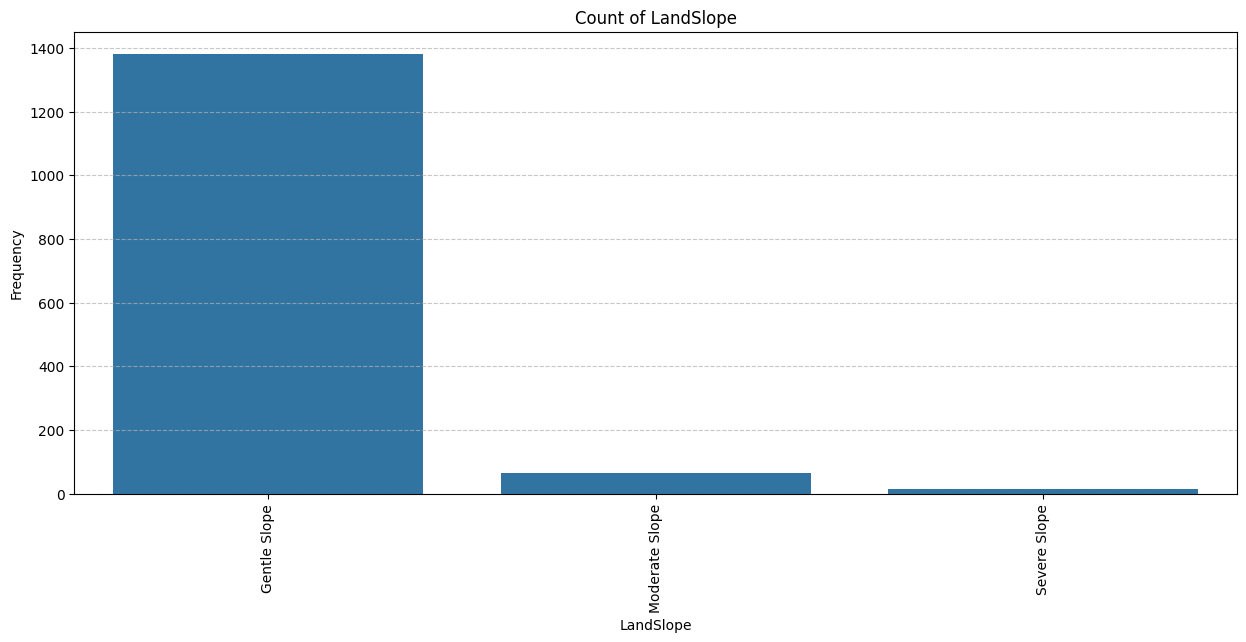

In [44]:
visualizer.plot('LandSlope')

#### Insights:
- The column is complete, requiring no missing value imputation.
- **Distribution:**
    - Gentle Slope: The overwhelming majority of properties (1,382 or ~94.7%) have a gentle slope.
    - Moderate Slope: 65 properties (~4.5%) have a moderate slope.
    - Severe Slope: 13 properties (~0.9%) have a severe slope, making it a rare category.
- Count Plot: The plot confirms the dominance of Gentle Slope, with Moderate Slope and Severe Slope being much less frequent.

## Neighborhood
### Checking for missing values

In [45]:
check_and_print_missing_value_counts(data, 'Neighborhood')

Missing values count: 225
Missing values percentage: 15.41%


### Descriptive Statistics

In [46]:
data['Neighborhood'].describe()

count              1235
unique               24
top       College Creek
freq                150
Name: Neighborhood, dtype: object

### Visualization

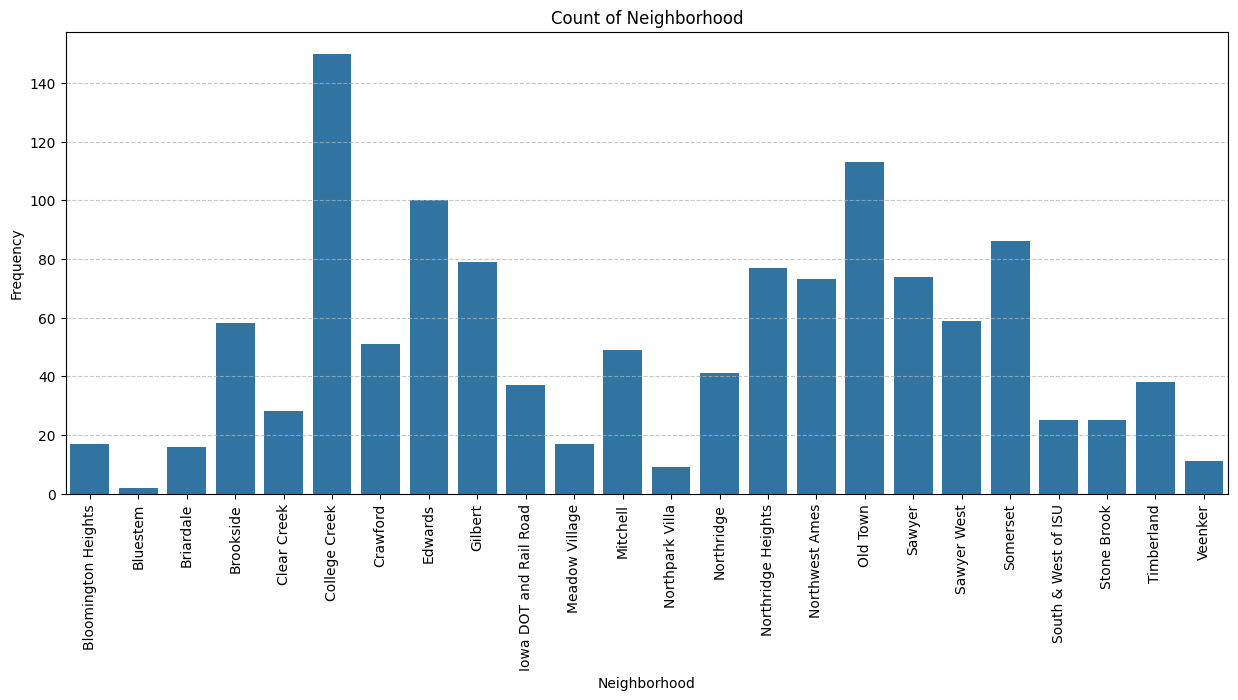

In [47]:
visualizer.plot('Neighborhood')

#### Insights:
- 225 missing values (15.41%): This is a significant proportion and should be handled carefully
- **Distribution:**
    - The most frequent neighborhood is College Creek, with 150 properties (~12.1% of non-missing entries).
    - Other frequently represented neighborhoods include Edwards, Old Town, and Gilbert.
    - Some neighborhoods, such as Bluestem, Bloomington Heights, and Veenker, have minimal representation, with less than 20 occurrences each.
- **Count Plot:** The distribution is uneven, with a few neighborhoods like College Creek dominating, while others have very few occurrences.

## Condition1
### Checking for missing values

In [49]:
check_and_print_missing_value_counts(data, 'Condition1')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [50]:
data['Condition1'].describe()

count       1460
unique         9
top       Normal
freq        1260
Name: Condition1, dtype: object

### Visualization

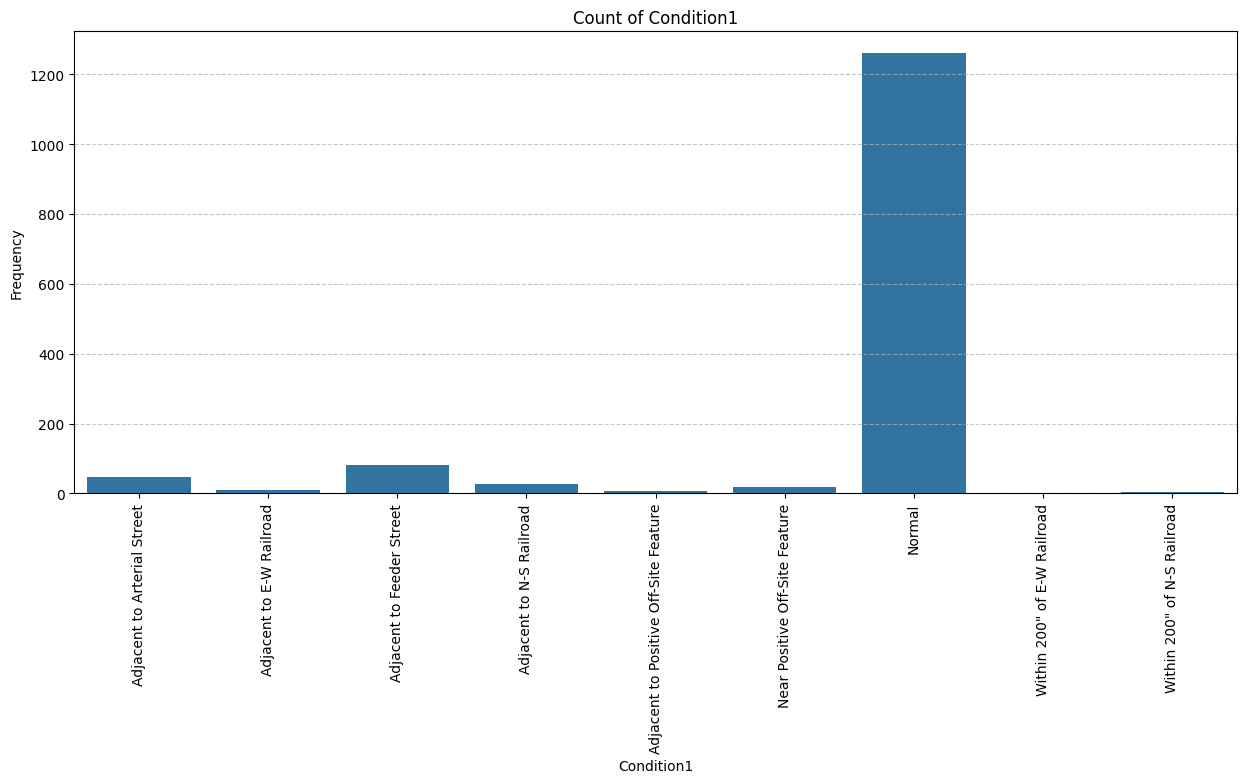

In [51]:
visualizer.plot('Condition1')

In [21]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo